<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_56/blob/main/Entrega_2_(16_11)_%3E_Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY**
 

 
**Maestría en Inteligencia Artificial**

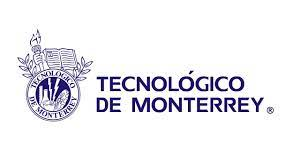

**Presenta:**
**Actividad Semanal 8**

**Tema:**
**Limpieza, análisis, visualización y kmeans**

**Materia:**
<!--  -->
**TC4029.10 - Ciencia y Análitica de Datos**

**Profesor Titular:**
**Dra. María de la Paz Rico Fernández**

**Alumno:**

*   **A01793625 - Luis Angel Hermenegildo Dominguez**
*   **A01332665 - Hector Montañez Alvarez**




**noviembre de 2022**


In [360]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
#!pip install geopandas
#!pip install qeds

In [361]:
#from google.colab import drive
#drive.mount('/content/drive')

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform, quantile_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import seaborn as sns 
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from shapely.geometry import Point
import geopandas as gpd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [363]:
#from google.colab import drive
#drive.mount('/content/drive')

In [364]:
#url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
datos = pd.read_csv(url1,encoding = "ISO-8859-1")
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Se comprueba que no hay valores nulos en el dataset

In [365]:
datos.shape

(1068, 57)

In [366]:
datos.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [367]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [368]:
datos['CALIDAD_MN'].describe()

datos['CALIDAD_MN'].value_counts()

Potable - Excelente                                  982
Puede afectar la salud                                50
Sin efectos en la salud - Puede dar color al agua     36
Name: CALIDAD_MN, dtype: int64

In [369]:
datos.shape

(1068, 57)

In [370]:
datos.drop(columns=['SDT_mg/L','CLAVE','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SITIO','PERIODO'], inplace=True)

In [371]:
#datos.isnull().values.any()
datos[datos.isna().any(axis=1)]

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO,-102.022100,22.208870,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO,-102.200750,21.999580,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,POZO,-102.294490,22.184350,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,POZO,-110.213960,23.474600,203.670,Alta,531.0,Buena para riego,278.8,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,POZO,-110.088778,23.799861,343.655,Alta,1114.0,Permisible para riego,672,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,POZO,-99.779110,25.533690,284.700,Alta,1208.0,Permisible para riego,745.4,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1057,POZO,-100.364400,25.675370,267.180,Alta,850.0,Permisible para riego,488.8,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1059,POZO,-99.838100,25.557590,374.490,Alta,1225.0,Permisible para riego,655,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1066,POZO,-100.326830,24.801180,193.140,Alta,873.0,Permisible para riego,690.6667,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [372]:
#Obtenemos los nombres de las columnas 

#list(datos.columns)

In [373]:
# imputacion por moda - Categóricos
datos_cat = ['CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
              'CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES'   ]

# imputacion por moda - Continuos
datos_cnt = ['LONGITUD', 'LATITUD' ,'ALC_mg/L', 'SDT_M_mg/L' ,'CONDUCT_mS/cm' ,'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L']

# imputacion por moda - Binarios
datos_bin = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF','CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR',
             'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN' , 'CUMPLE_CON_FE' ]

In [374]:
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cat_pipeline_names = datos_cat

cnt_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cnt_pipeline_names = datos_cnt

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
bin_pipeline_names = datos_bin

In [375]:
columnTransfomer = ColumnTransformer(transformers = [('catpimp', cat_pipeline, cat_pipeline_names),
                                                       ('cntimp', cnt_pipeline, cnt_pipeline_names),
                                                       ('binimp', bin_pipeline, bin_pipeline_names)
                                                       ],
                                       remainder='passthrough')
#pipeline = make_pipeline(columnTransfomer)

In [376]:
#ndf = columnTransfomer.fit_transform(datos)

#columnTransfomer.get_feature_names_out
#df = pd.DataFrame(ndf )
#df = pd.DataFrame(ndf, columns=columnTransfomer.get_feature_names_out())
#df

#Se realizan reemplazo de valores nulos
datos = datos.fillna(datos.mode().iloc[0])

datos

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,POZO,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,POZO,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,POZO,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,POZO,-99.54191,24.76036,231.045,Alta,2350.0,Dudosa para riego,1545.8,Cultivos con manejo especial,Ligeramente salobres,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,POZO,-99.70099,24.78280,256.000,Alta,529.0,Buena para riego,297,Excelente para riego,Potable - Dulce,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,POZO,-99.82249,25.55197,330.690,Alta,2600.0,Dudosa para riego,1873,Cultivos con manejo especial,Ligeramente salobres,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,POZO,-100.32683,24.80118,193.140,Alta,873.0,Permisible para riego,690.6667,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [377]:
#datos = datos.astype({"SDT_M_mg/L": float})

In [378]:
#datos[SDT_M_mg/L].astype('float64').dtypes

In [379]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBTIPO               1068 non-null   object 
 1   LONGITUD              1068 non-null   float64
 2   LATITUD               1068 non-null   float64
 3   ALC_mg/L              1068 non-null   float64
 4   CALIDAD_ALC           1068 non-null   object 
 5   CONDUCT_mS/cm         1068 non-null   float64
 6   CALIDAD_CONDUC        1068 non-null   object 
 7   SDT_M_mg/L            1068 non-null   object 
 8   CALIDAD_SDT_ra        1068 non-null   object 
 9   CALIDAD_SDT_salin     1068 non-null   object 
 10  FLUORUROS_mg/L        1068 non-null   object 
 11  CALIDAD_FLUO          1068 non-null   object 
 12  DUR_mg/L              1068 non-null   object 
 13  CALIDAD_DUR           1068 non-null   object 
 14  COLI_FEC_NMP/100_mL   1068 non-null   object 
 15  CALIDAD_COLI_FEC     

In [380]:
##Validar si aún existen valores vacios
datos.isnull().values.any()


False

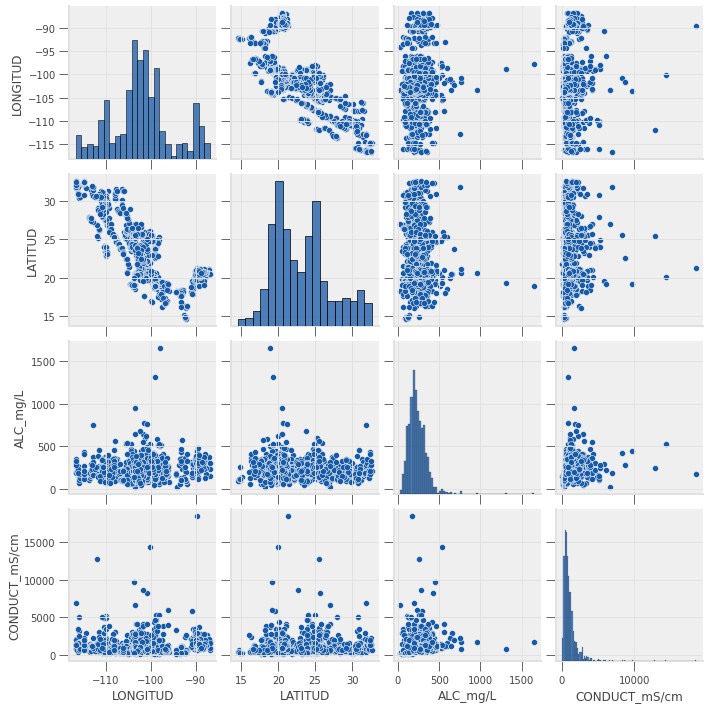

In [381]:
#Visualización de la dispersión de los datos y correlación
sns.pairplot(datos)

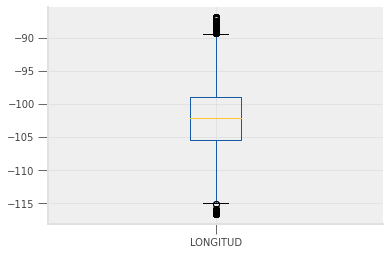

In [382]:
#Se generan gráficos BOXPLOT

datos.boxplot(column=['LONGITUD'])  

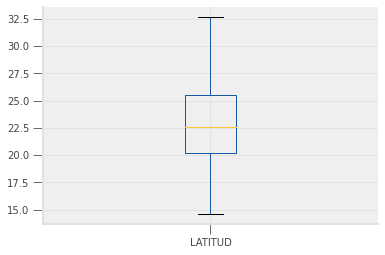

In [383]:
datos.boxplot(column=['LATITUD'])

In [384]:
#datos.boxplot(column=['PERIODO'])

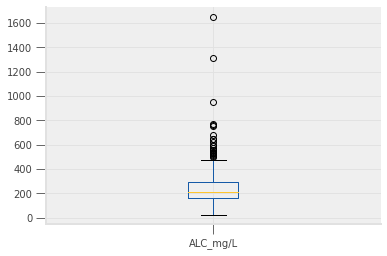

In [385]:
datos.boxplot(column=['ALC_mg/L'])

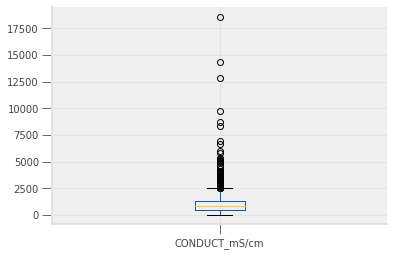

In [386]:
datos.boxplot(column=['CONDUCT_mS/cm'])

In [387]:
datos.corr(method='pearson', min_periods=2)

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.760204,0.167877,0.062054
LATITUD,-0.760204,1.000000,-0.079951,0.053043
ALC_mg/L,0.167877,-0.079951,1.000000,0.217574
CONDUCT_mS/cm,0.062054,0.053043,0.217574,1.000000


In [388]:
CALIDAD_ALC1 = ['Alta' ,'Media']

CALIDAD_CONDUC1 = ['Permisible para riego' ,'Buena para riego' ,'Dudosa para riego',
                        ]
CALIDAD_SDT_ra1 = ['Cultivos sensibles' ,'Excelente para riego',
                    'Cultivos con manejo especial' ]
CALIDAD_SDT_salin1 = ['Potable - Dulce', 'Ligeramente salobres', ]

CALIDAD_FLUO1 = ['Potable - Optima' ,'Alta' ,'Baja' ,'Media']

CALIDAD_DUR1 = ['Potable - Dura' ,'Potable - Suave', 'Potable - Moderadamente suave' ]

CALIDAD_COLI_FEC1 = ['Potable - Excelente' ,'Aceptable' ,'Buena calidad']

CALIDAD_N_NO31 = ['Potable - Excelente' ,'Potable - Buena calidad' ,'No apta como FAAP' ]

CALIDAD_AS1 = ['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente']

CALIDAD_MN1 = ['Potable - Excelente' , 'Sin efectos en la salud - Puede dar color al agua']

CALIDAD_FE1 = ['Potable - Excelente' ,'Sin efectos en la salud - Puede dar color al agua']

In [389]:
#Filtrafo de datos 
newdf_pot = datos.loc[(datos.CALIDAD_MN == 'Potable - Excelente')]
newdf_sin = datos.loc[(datos.CALIDAD_MN == 'Sin efectos en la salud - Puede dar color al agua')]
newdf_pu = datos.loc[(datos.CALIDAD_MN == 'Puede afectar la salud')]



In [390]:
#Tamano de Potable/ excelente 
newdf_pot.shape

(982, 49)

In [391]:
#Tamano Sin efectos en la salud - Puede dar color al agua' 
newdf_sin.shape

(36, 49)

In [392]:
#Tamano 'Puede afectar la salud'' 
newdf_pu.shape

(50, 49)

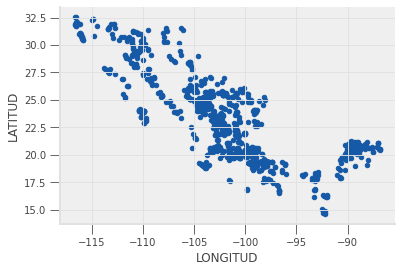

In [393]:
latlong_pot=newdf_pot[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


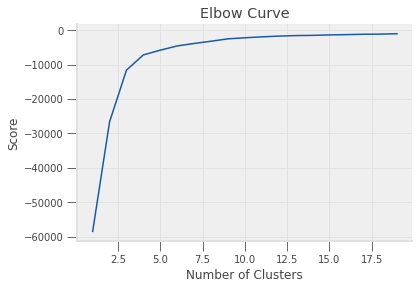

In [394]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pot).score(latlong_pot) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [395]:
kmeans = KMeans(n_clusters=5).fit(latlong_pot)
centroids_pot = kmeans.cluster_centers_
print(centroids_pot)

[[-102.5814367    24.24417415]
 [ -89.96743794   19.71226617]
 [-112.25418009   30.13391374]
 [-100.0934019    19.90126744]
 [-107.78824727   25.82241918]]


Numer de agrupaciones para agua potable = 5

In [396]:
latlong_pot["Coordinates"] = list(zip(latlong_pot.LONGITUD, latlong_pot.LATITUD))
latlong_pot["Coordinates"] = latlong_pot["Coordinates"].apply(Point)
gdf_pot = gpd.GeoDataFrame(latlong_pot, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


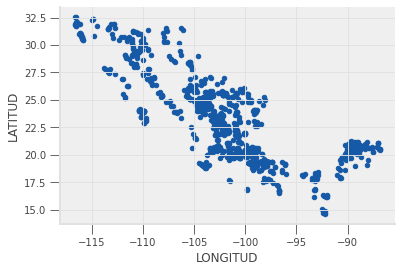

In [397]:
latlong_sin=newdf_sin[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


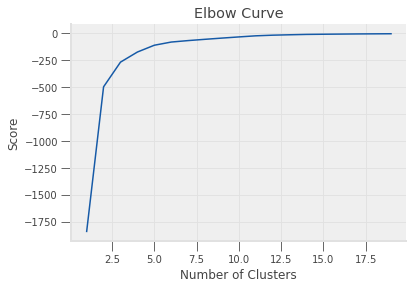

In [398]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_sin).score(latlong_sin) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones de =  3 
para grupo Sin efectos en la salud - Puede dar color al agua

In [399]:
kmeans = KMeans(n_clusters=3).fit(latlong_sin)
centroids_sin = kmeans.cluster_centers_
print(centroids_sin)

[[ -99.0686151    19.9456238 ]
 [-114.1748152    32.1619394 ]
 [-104.68104      21.33039636]]


In [400]:
latlong_sin["Coordinates"] = list(zip(latlong_sin.LONGITUD, latlong_sin.LATITUD))
latlong_sin["Coordinates"] = latlong_sin["Coordinates"].apply(Point)
gdf_sin = gpd.GeoDataFrame(latlong_sin, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


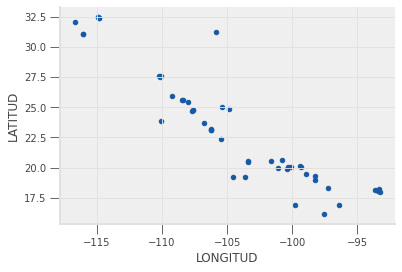

In [401]:
latlong_pu=newdf_pu[["LONGITUD","LATITUD"]]
latlong_pu.plot.scatter( "LONGITUD","LATITUD")

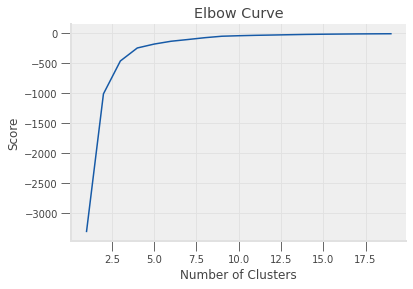

In [402]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pu).score(latlong_pu) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones = 5 
para el grupo 'Puede afectar la salud' 

In [403]:
kmeans = KMeans(n_clusters=5).fit(latlong_pu)
centroids_pu = kmeans.cluster_centers_
print(centroids_pu)

[[-100.83072025   19.70332119]
 [-115.46716271   32.000323  ]
 [-106.418884     23.971429  ]
 [ -94.7724535    17.73327775]
 [-108.93516689   26.70074911]]


In [404]:
latlong_pu["Coordinates"] = list(zip(latlong_pu.LONGITUD, latlong_pu.LATITUD))
latlong_pu["Coordinates"] = latlong_pu["Coordinates"].apply(Point)
gdf_pu = gpd.GeoDataFrame(latlong_pu, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


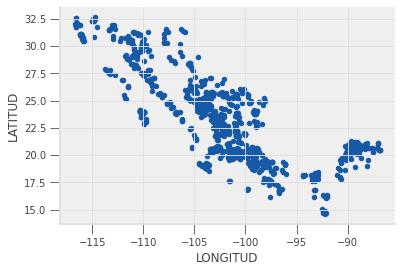

In [405]:
latlong=datos[["LONGITUD","LATITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [406]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [407]:
datos["Coordinates"] = list(zip(datos.LONGITUD, datos.LATITUD))
datos["Coordinates"] = datos["Coordinates"].apply(Point)
datos.head()

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,POZO,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,POZO,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [408]:
gdf = gpd.GeoDataFrame(datos, geometry="Coordinates")
gdf.head()
gdf.shape

(1068, 50)

In [409]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


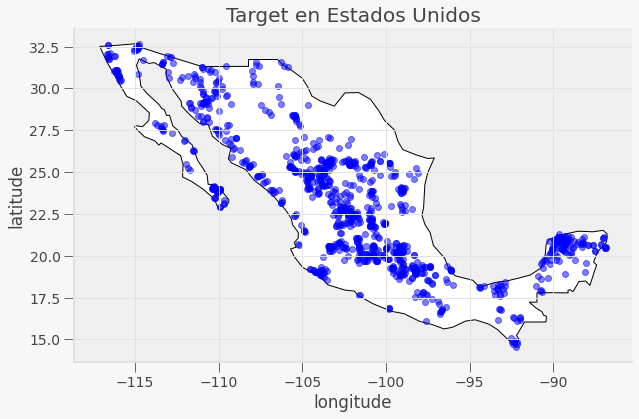

In [410]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

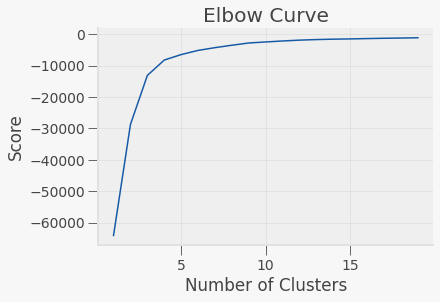

In [411]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [412]:
kmeans = KMeans(n_clusters=5).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)

[[-102.57873342   24.20554738]
 [-112.58798516   30.31649148]
 [ -90.09271578   19.6502625 ]
 [-107.79199926   25.85352689]
 [-100.12647372   19.82511781]]


In [413]:

cent = pd.DataFrame(centroids, columns=["longitude","latitude"])
cent.head(1)
cent.shape
cent.head(5)

,longitude,latitude
0,-102.578733,24.205547
1,-112.587985,30.316491
2,-90.092716,19.650263
3,-107.791999,25.853527
4,-100.126474,19.825118


In [414]:
cent1 = pd.DataFrame(centroids_pot, columns=["longitude","latitude"])
cent2 = pd.DataFrame(centroids_sin, columns=["longitude","latitude"])
cent3 = pd.DataFrame(centroids_pu, columns=["longitude","latitude"])

In [415]:
cent1["Coordinates"] = list(zip(cent1.longitude, cent1.latitude))
cent1["Coordinates"] = cent1["Coordinates"].apply(Point)

cent2["Coordinates"] = list(zip(cent2.longitude, cent2.latitude))
cent2["Coordinates"] = cent2["Coordinates"].apply(Point)

cent3["Coordinates"] = list(zip(cent3.longitude, cent3.latitude))
cent3["Coordinates"] = cent3["Coordinates"].apply(Point)

In [416]:
gdf1 = gpd.GeoDataFrame(cent1, geometry="Coordinates")
gdf2 = gpd.GeoDataFrame(cent2, geometry="Coordinates")
gdf3 = gpd.GeoDataFrame(cent3, geometry="Coordinates")

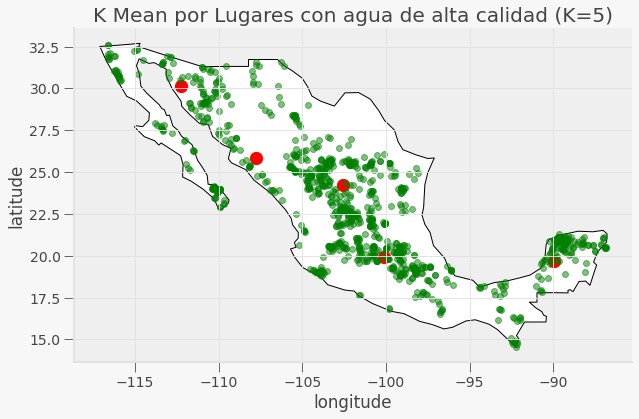

In [417]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pot.plot(ax=gax, color='green', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de alta calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

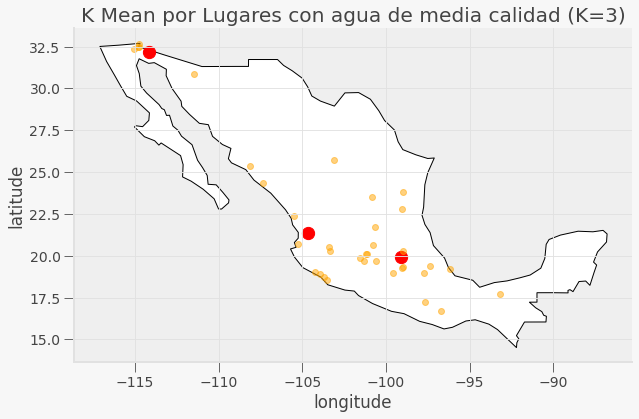

In [418]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf2.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_sin.plot(ax=gax, color='orange', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de media calidad (K=3)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

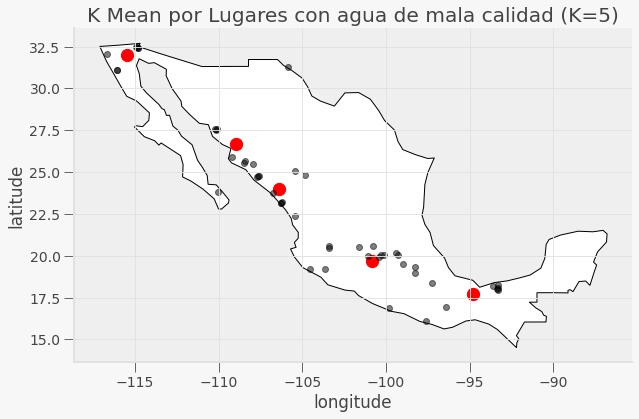

In [419]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf3.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pu.plot(ax=gax, color='black', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de mala calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

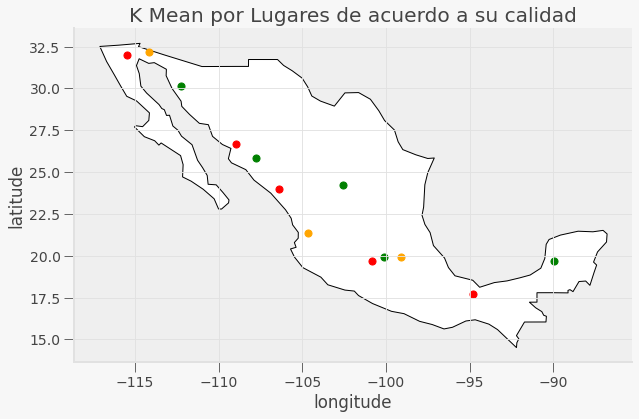

In [420]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='green', alpha = 1,markersize=50)
gdf2.plot(ax=gax, color='orange', alpha = 1,markersize=50)
gdf3.plot(ax=gax, color='red', alpha = 1,markersize=50)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares de acuerdo a su calidad')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [421]:
#Mas filtrado de informacion 
#Eliminar Clave,sitio  y registro  ORGANISMO_DE_CUENCA','ORGANISMO_DE_CUENCA','MUNICIPIO','ACUIFERO','SUBTIPO','ESTADO'

In [422]:
#datos = datos.drop([''], axis=1).  #Codigo utilizado para borrar columnas 

#renombrar los valores de CALIDAD_CONDUC ,CALIDAD_SDT_ra

### ===========================2 Parte =================================

In [423]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SUBTIPO               1068 non-null   object  
 1   LONGITUD              1068 non-null   float64 
 2   LATITUD               1068 non-null   float64 
 3   ALC_mg/L              1068 non-null   float64 
 4   CALIDAD_ALC           1068 non-null   object  
 5   CONDUCT_mS/cm         1068 non-null   float64 
 6   CALIDAD_CONDUC        1068 non-null   object  
 7   SDT_M_mg/L            1068 non-null   object  
 8   CALIDAD_SDT_ra        1068 non-null   object  
 9   CALIDAD_SDT_salin     1068 non-null   object  
 10  FLUORUROS_mg/L        1068 non-null   object  
 11  CALIDAD_FLUO          1068 non-null   object  
 12  DUR_mg/L              1068 non-null   object  
 13  CALIDAD_DUR           1068 non-null   object  
 14  COLI_FEC_NMP/100_mL   1068 non-null   object  
 15  CALI

In [424]:
datos.shape

(1068, 50)

In [425]:
datos.head()

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,POZO,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,POZO,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [426]:
#Renombrando valores de columnas  'CALIDAD_CONDUC'
datos["CALIDAD_CONDUC"].value_counts().to_frame()

,CALIDAD_CONDUC
Permisible para riego,466
Buena para riego,434
Dudosa para riego,72
Indeseable para riego,51
Excelente para riego,45


In [427]:
#Codigo de transformacion 

#Permisible para riego = 1
#Buena para riego = 2
#Dudosa para riego = 3
#Indeseable para riego = 4
#Excelente para riego = 5

In [428]:
#Renombramos las variables de semaforo 
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Permisible para riego", 1)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Buena para riego", 2)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Dudosa para riego", 3)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Indeseable para riego", 4)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Excelente para riego", 5)

In [429]:
datos["CALIDAD_CONDUC"].value_counts().to_frame()

,CALIDAD_CONDUC
1,466
2,434
3,72
4,51
5,45


In [430]:
datos["SEMAFORO"].value_counts().to_frame()

,SEMAFORO
Verde,434
Rojo,387
Amarillo,247


In [431]:
#Renombramos las variables de semaforo 
datos["SEMAFORO"] = datos["SEMAFORO"].replace("Verde", 1)
datos["SEMAFORO"] = datos["SEMAFORO"].replace("Rojo", 2)
datos["SEMAFORO"] = datos["SEMAFORO"].replace("Amarillo", 3)

In [432]:
#Comprobamos que los datos se mantienen 
datos["SEMAFORO"].value_counts().to_frame()

,SEMAFORO
1,434
2,387
3,247


In [433]:
col = 'SEMAFORO'#Retiramos la variables que no aportan informacion


In [434]:
Y = datos['SEMAFORO'] #Seleccionamos la variable de salida

X = datos.loc[:, datos.columns != 'SEMAFORO']

In [435]:
X.loc[(X['SUBTIPO'] != 'POZO')].head()

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
153,MANANTIAL,-103.86679,19.30209,234.35,Alta,566.0,2,434.2,Excelente para riego,Potable - Dulce,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-103.86679 19.30209)
154,MANANTIAL,-103.83367,19.16797,223.45,Alta,877.0,1,612,Cultivos sensibles,Potable - Dulce,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-103.83367 19.16797)
155,MANANTIAL,-103.62713,19.20459,446.90,Indeseable como FAAP,9740.0,4,3980.6,Cultivos tolerantes,Salobres,...,SI,SI,SI,SI,SI,SI,SI,NO,NO,POINT (-103.62713 19.20459)
157,MANANTIAL,-103.54440,19.08445,188.57,Alta,545.0,2,351.8,Excelente para riego,Potable - Dulce,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-103.54440 19.08445)
166,MANANTIAL,-103.87371,19.06650,256.15,Alta,1051.0,1,1740,Cultivos con manejo especial,Ligeramente salobres,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-103.87371 19.06650)


In [436]:
Y.head()

0    1
1    1
2    2
3    1
4    2
Name: SEMAFORO, dtype: int64

In [437]:
print(datos.shape) #Corroboramos los tamanos 
print(X.shape)
print(Y.shape)

(1068, 50)
(1068, 49)
(1068,)


Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [206]:
#X.info()

In [207]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.3, shuffle=True, random_state=17)

mimodelo = RandomForestClassifier()

clf = mimodelo.fit(Xtrain,Ytrain)

results = clf.predict(Xtest)

confusion_matrix(Ytest, results)

ValueError: ignored

In [ ]:
X_tv, X_test, y_tv, y_test = train_test_split(X, Y, test_size=.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.25, shuffle=True, random_state=1)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de validación:', X_val.shape)
print('Tamaño del conjunto de prueba', X_test.shape)

In [ ]:
modeloDT = DecisionTreeClassifier()   # Incializamos el modelo con los hiperparámetros predeterminados.

clf = modeloDT.fit(X_train, y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

# Podemos observar el desempeño en el conjunto de entrenamieto para verificar
# el subentrenamiento o sobreentrenamiento, pero no para evaluar el modelo en sí:
print('Exactitud en el conjunto de entrenamiento: %.2f' % clf.score(X_train, y_train))

# Así, el conjunto con el que nos interesa evaluar el desempeño es con los de validación,
# así que calculamos primero sus predicciones y después las usamos para evaluar el modelo:

predi = clf.predict(X_val)     # Obtenemos predicciones de 0s, 1s o 2s para cada clase

print('Exactitud en el conjunto de validación: %.2f' % clf.score(X_val, y_val))

Realiza tu clasificador, recuerda dividir los datos de manera balancead (auxiliate de train test split)

In [440]:
X=datos[['SUBTIPO','CALIDAD_FLUO', 'CALIDAD_SDT_ra']]
y=datos['SEMAFORO'] 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=10)

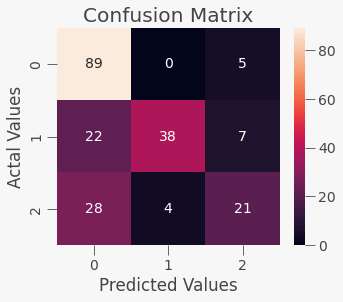

In [441]:

my_model = DecisionTreeClassifier()

#pipeline = 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
categorical_values = ['SUBTIPO','CALIDAD_FLUO', 'CALIDAD_SDT_ra']
numeric_transformer = Pipeline(steps=[('minmax', StandardScaler())])
numeric_values = ['C']

columnasTransformer = ColumnTransformer(
    transformers = [
        ('categorical_data', categorical_transformer, categorical_values)
        #('numeric_data', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)
pipe = Pipeline([('pre-process', columnasTransformer), ('model', my_model)])

pipe.fit(x_train,y_train)

yhat = pipe.predict(x_test)

cm = confusion_matrix(y_test, yhat)



#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Declaramos los modelos a evaluar

In [442]:
def get_models():
    """
    El objetivo de esta funcion es regresar dos listas con los modelos y nombre de cada uno
    return models, nombres
    """
    models = list()
    nombres = list()
    params = list()
    
    models.append(DecisionTreeClassifier())
    nombres.append('DT')
    params.append({
        'model__ccp_alpha': [10, 1, 0, 0.005],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [8,10,12],
        'model__min_samples_split': [2],
        'model__class_weight': [None]
    })
    
    models.append(RandomForestClassifier())
    nombres.append('RF')
    params.append({
        'model__ccp_alpha': [10, 1, 0, 0.005],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [8,10],
        'model__min_samples_split': [2],
        'model__class_weight': [None],
        'model__n_jobs': [-1]
    })
    
    return models, nombres, params
# Se obtienen los modelos a entrenar
models, nombres, params = get_models() 

Definimos los métricas

In [465]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

resultados = list()
scorer = [f1_score , recall_score, accuracy_score ]
scorer_name = ['f1-score','recall', 'accuracy']

Declaramos funciones para retornar pipeline  y evaluación en malla.

In [456]:
def get_pipeline(model) -> Pipeline:
    return Pipeline([('pre-process', columnasTransformer), ('model', model)])
def do_grid_search(model, nombre, dicc_grid, metric):

    grid_pipe = get_pipeline(model)

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv, 
        param_grid=dicc_grid)
        #, scoring=metric)

    #Xx = columnasTransformer.fit_transform(Xtv)
    
    grid.fit(x_train, y_train.values.ravel())
    
    print(nombre)
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print(f'Métrica utilizada: {grid.scoring}\n')
    
    return grid.best_score_, grid.best_params_, {grid.scoring}

Encontramos los mejores parametros

In [452]:
y_train.value_counts()

1    340
2    320
3    194
Name: SEMAFORO, dtype: int64

In [461]:
models, nombres, params = get_models();
best_params = list()
for i in range(len(models)):
    b_score, b_params, b_scoring = do_grid_search(models[i], nombres[i], params[i],None)
    best_params.append(b_params)

DT
Mejor valor de exactitud obtenido con la mejor combinación: 0.6779474830868021
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.005, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_split': 2}
Métrica utilizada: None

RF
Mejor valor de exactitud obtenido con la mejor combinación: 0.6736521041165006
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_jobs': -1}
Métrica utilizada: None



Comparamos modelos con los mejores parámetros

Modelo DT
              precision    recall  f1-score   support

        ROJO       0.64      0.96      0.77        94
    AMARILLO       1.00      0.55      0.71        67
       VERDE       0.68      0.47      0.56        53

    accuracy                           0.71       214
   macro avg       0.77      0.66      0.68       214
weighted avg       0.76      0.71      0.70       214



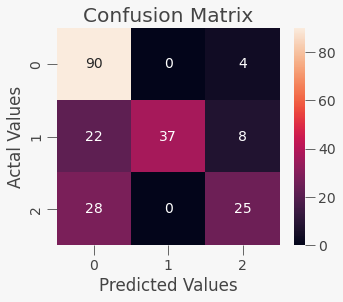

Modelo RF
              precision    recall  f1-score   support

        ROJO       0.64      0.96      0.77        94
    AMARILLO       0.93      0.57      0.70        67
       VERDE       0.67      0.42      0.51        53

    accuracy                           0.70       214
   macro avg       0.75      0.65      0.66       214
weighted avg       0.74      0.70      0.68       214



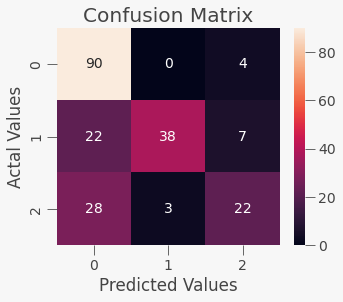

In [474]:
for i in range(len(models)):
  pipe = Pipeline([('pre-process', columnasTransformer), ('model', models[i])])
  pipe.set_params(**best_params[i])

  pipe.fit(x_train,y_train)

  yhat = pipe.predict(x_test)

  cm = confusion_matrix(y_test, yhat)
  target_names=['ROJO','AMARILLO','VERDE']
  print(f'Modelo {nombres[i]}')
  print(classification_report(y_test, yhat, target_names=target_names))
  #Plotting the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()
